## 1. Import Packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

## 2. Load Dataset

In [2]:
df = pd.read_csv('/content/brimo_googleplaystore_review.csv')
df.head()

,Unnamed: 0,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,c4f79594-78cd-48d5-876f-ef864d13657a,Memudahkan saya untuk melakukan transaksi apapun,5,0,2.35.0,1/31/2023 23:59,NaN,NaN
1,1,88754df5-86f1-42f7-ba5d-a9ca5df6c1e6,Mantap,5,0,2.35.0,1/31/2023 23:59,NaN,NaN
2,2,8f5ca792-d4f2-4ea9-9c9f-6720bc3e942c,Aplikasi nya sangat membantu segala bentuk tra...,5,0,NaN,1/31/2023 23:59,NaN,NaN
3,3,0297f1bd-2dc9-4509-9c72-f1801964fb87,simpel cepat. ga repot,5,0,2.31.0,1/31/2023 23:58,NaN,NaN
4,4,72617e6a-048b-42cd-bce3-c526a4afe9a5,bagus,5,0,2.35.0,1/31/2023 23:55,NaN,NaN


## 3. Preprocessing Data

In [3]:
# only get neccesery column
df = df[['content', 'score']]
df

,content,score
0,Memudahkan saya untuk melakukan transaksi apapun,5
1,Mantap,5
2,Aplikasi nya sangat membantu segala bentuk tra...,5
3,simpel cepat. ga repot,5
4,bagus,5
...,...,...
17214,bagus,5
17215,bagus,5
17216,"Brimo gk bisa masuk, banyak transaksiku gagal ...",1
17217,Terima kasih telah memberi kan layanan yang te...,5


In [4]:
# stop words dictionary
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [5]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

df['content_preprocessed'] = ''
for index, row in df.iterrows():
  df_without_stopwords = stopword.remove(row['content'])
  df.at[index, 'content_preprocessed'] = df_without_stopwords

df.head()

,content,score,content_preprocessed
0,Memudahkan saya untuk melakukan transaksi apapun,5,Memudahkan untuk melakukan transaksi apapun
1,Mantap,5,Mantap
2,Aplikasi nya sangat membantu segala bentuk tra...,5,Aplikasi nya sangat membantu segala bentuk tra...
3,simpel cepat. ga repot,5,simpel cepat. ga repot
4,bagus,5,bagus


In [6]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def remove_punctuation(text):
  tokens = word_tokenize(text)
  tokens_without_punctuation = [word for word in tokens if word.isalnum()]
  text_wihtout_punctuation = ' '.join(tokens_without_punctuation)
  return text_wihtout_punctuation

def remove_non_alphanumeric(text):
  text_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return text_cleaned

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
df['content_preprocessed_v2'] = df['content_preprocessed'].apply(remove_punctuation)
df.tail()

,content,score,content_preprocessed,content_preprocessed_v2
17214,bagus,5,bagus,bagus
17215,bagus,5,bagus,bagus
17216,"Brimo gk bisa masuk, banyak transaksiku gagal ...",1,"Brimo gk masuk, banyak transaksiku gagal Kecewa 😇",Brimo gk masuk banyak transaksiku gagal Kecewa
17217,Terima kasih telah memberi kan layanan yang te...,5,Terima kasih memberi kan layanan terbaik buat ...,Terima kasih memberi kan layanan terbaik buat ...
17218,So far so bagus,5,So far so bagus,So far so bagus


In [8]:
df['content_preprocessed_v2'] = df['content_preprocessed_v2'].apply(remove_non_alphanumeric)
df.tail()

,content,score,content_preprocessed,content_preprocessed_v2
17214,bagus,5,bagus,bagus
17215,bagus,5,bagus,bagus
17216,"Brimo gk bisa masuk, banyak transaksiku gagal ...",1,"Brimo gk masuk, banyak transaksiku gagal Kecewa 😇",Brimo gk masuk banyak transaksiku gagal Kecewa
17217,Terima kasih telah memberi kan layanan yang te...,5,Terima kasih memberi kan layanan terbaik buat ...,Terima kasih memberi kan layanan terbaik buat ...
17218,So far so bagus,5,So far so bagus,So far so bagus


In [9]:
# df = df.dropna(subset=['content_preprocessed_v2'])
df = df[df['content_preprocessed_v2'].notnull()]
df.tail()

missing_value = df['content_preprocessed_v2'].isnull()

print(df.dropna(subset=['content_preprocessed_v2']))

                                                 content  score  \
0       Memudahkan saya untuk melakukan transaksi apapun      5   
1                                                 Mantap      5   
2      Aplikasi nya sangat membantu segala bentuk tra...      5   
3                                 simpel cepat. ga repot      5   
4                                                  bagus      5   
...                                                  ...    ...   
17214                                              bagus      5   
17215                                              bagus      5   
17216  Brimo gk bisa masuk, banyak transaksiku gagal ...      1   
17217  Terima kasih telah memberi kan layanan yang te...      5   
17218                                    So far so bagus      5   

                                    content_preprocessed  \
0            Memudahkan untuk melakukan transaksi apapun   
1                                                 Mantap   
2      Aplikasi

In [10]:
def update_score(score):
  if score < 4:
    return 0
  else:
    return 1

In [11]:
df['score'] = df['score'].apply(update_score)
df.tail()

,content,score,content_preprocessed,content_preprocessed_v2
17214,bagus,1,bagus,bagus
17215,bagus,1,bagus,bagus
17216,"Brimo gk bisa masuk, banyak transaksiku gagal ...",0,"Brimo gk masuk, banyak transaksiku gagal Kecewa 😇",Brimo gk masuk banyak transaksiku gagal Kecewa
17217,Terima kasih telah memberi kan layanan yang te...,1,Terima kasih memberi kan layanan terbaik buat ...,Terima kasih memberi kan layanan terbaik buat ...
17218,So far so bagus,1,So far so bagus,So far so bagus


In [12]:
df = df[['content_preprocessed_v2', 'score']]
df.to_csv('brimo_review_clean_data.csv', index=False)
df.tail()

,content_preprocessed_v2,score
17214,bagus,1
17215,bagus,1
17216,Brimo gk masuk banyak transaksiku gagal Kecewa,0
17217,Terima kasih memberi kan layanan terbaik buat ...,1
17218,So far so bagus,1


In [13]:
# Max word length
df['content_preprocessed_v2'].str.len().sort_values(ascending=False)

2888     481
11782    432
2101     426
4255     424
14314    424
        ... 
12898      0
6893       0
6859       0
11129      0
6623       0
Name: content_preprocessed_v2, Length: 17219, dtype: int64

## 4. Pembagian Subset Data

In [14]:
text = df['content_preprocessed_v2'].values
label = df['score'].values

print(f"total row text review: {df['content_preprocessed_v2'].count()}")
print(f"total row label: {df['score'].count()}")

total row text review: 17219
total row label: 17219


In [15]:
# Training 80%; Validation 20%
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=42)
print(f"total training set: text({len(text_train)}); label({len(label_train)})")
print(f"total validation set: text({len(text_test)}); label({len(label_test)})")

total training set: text(13775); label(13775)
total validation set: text(3444); label(3444)


## 5. Tokenize dan Embedd

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_sequence_length = 481
embedding_dimension = 100

tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sequence_latih = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

padded_latih = pad_sequences(sequence_latih,
                            #  padding='post',
                             maxlen = max_sequence_length,
                            #  truncating='post'
                             )
padded_test = pad_sequences(sequence_test,
                            #  padding='post',
                             maxlen = max_sequence_length,
                            #  truncating='post'
                             )

print(text_train)
print(tokenizer.word_index)

['Lumayan menu lengkap Apk baik Minusnya pengambilan tunai max 1jt per pengambilan Itu menyita waktu byk bila yg antri atm banyak Mohon update pengambilan tunai spt atm 25 lembar'
 'sangat mebantu kepepet' 'Mantaapp' ...
 'Udah berapa bulan simpen apk coba berulang kali gagal terus terakhir tinggal bikin tanda tangan sesuai KTP udah tandatangini malah gagal terus hadeh capek bener dwh'
 'mantap istimewa' 'Sangat puas memudahkan untuk bertransaksi']
{'x': 420, 'sangat': 2, 'bagus': 3, 'membantu': 4, 'brimo': 5, 'mantap': 6, 'mudah': 7, 'aplikasi': 8, 'transaksi': 9, 'nya': 10, 'bri': 11, 'mau': 12, 'gagal': 13, 'lebih': 14, 'gak': 15, 'cepat': 16, 'sekali': 17, 'yg': 18, 'saya': 19, 'terus': 20, 'bisa': 21, 'memudahkan': 22, 'aja': 23, 'ga': 24, 'selalu': 25, 'baik': 26, 'padahal': 27, 'di': 28, 'banget': 29, 'buat': 30, 'susah': 31, 'jadi': 32, 'udah': 33, 'bank': 34, 'mempermudah': 35, 'daftar': 36, 'saldo': 37, 'tunai': 38, 'atm': 39, 'malah': 40, 'tidak': 41, 'masuk': 42, 'ribet': 4

## 6. Define LSTM Architecture

In [17]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_words, output_dim = embedding_dimension, input_length=padded_latih.shape[1]),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])

## 7. Define Callbacks

In [18]:
import datetime
import os
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping

num_epochs = 5

experiment_name = f"initial_state_{num_epochs}-epoch"
date_now = datetime.datetime.now().strftime("_%d-%m-%Y_%H-%M-%S")

lokasiModel = os.path.join(f"train//{experiment_name + date_now}", experiment_name + '.h5')
lokasiCSV = os.path.join(f"train//{experiment_name + date_now}", experiment_name + '.csv')

callbacks = [
    ModelCheckpoint(lokasiModel, verbose=1, save_best_only=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=1e-6, verbose=1),
    CSVLogger(lokasiCSV),
    EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=False)
]

## 8. Train and Evalue the Model

In [19]:
history = model.fit(padded_latih, label_train, epochs=num_epochs, batch_size = 128,
                    validation_data=(padded_test, label_test), callbacks=callbacks)

Epoch 1/5
108/108 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.8788
Epoch 1: val_loss improved from inf to 0.18508, saving model to train//initial_state_5-epoch_19-12-2023_01-43-07/initial_state_5-epoch.h5
108/108 [==============================] - 28s 181ms/step - loss: 0.2945 - accuracy: 0.8788 - val_loss: 0.1851 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 2/5
  1/108 [..............................] - ETA: 2s - loss: 0.1341 - accuracy: 0.9531

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


106/108 [============================>.] - ETA: 0s - loss: 0.1646 - accuracy: 0.9438
Epoch 2: val_loss improved from 0.18508 to 0.18067, saving model to train//initial_state_5-epoch_19-12-2023_01-43-07/initial_state_5-epoch.h5
108/108 [==============================] - 10s 92ms/step - loss: 0.1645 - accuracy: 0.9437 - val_loss: 0.1807 - val_accuracy: 0.9358 - lr: 0.0010
Epoch 3/5
107/108 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9577
Epoch 3: val_loss did not improve from 0.18067
108/108 [==============================] - 7s 66ms/step - loss: 0.1362 - accuracy: 0.9577 - val_loss: 0.1862 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 4/5
108/108 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9635
Epoch 4: val_loss did not improve from 0.18067
108/108 [==============================] - 6s 57ms/step - loss: 0.1178 - accuracy: 0.9635 - val_loss: 0.2023 - val_accuracy: 0.9344 - lr: 0.0010


## 9. Visualize The Result

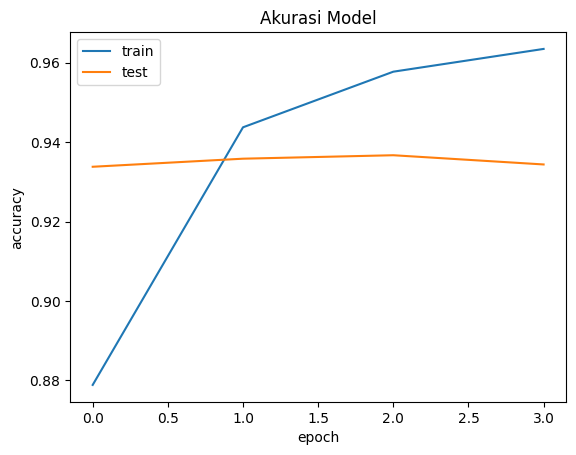

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

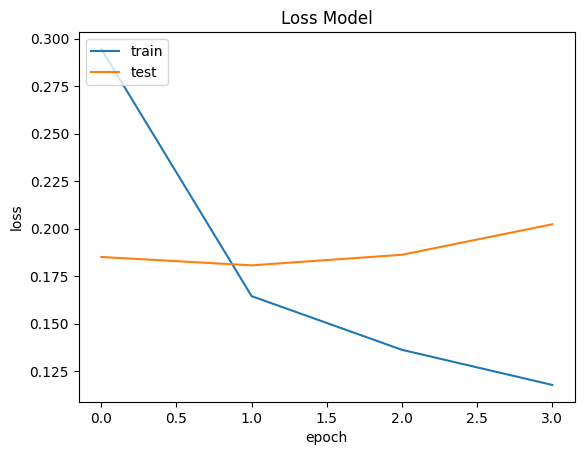

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()